In [21]:
def print_words_number():
    print("Number of unique words in {0} dataset: {1}".format(1, len(Counter(dict1))))
    print("Number of unique words in {0} spam dataset: {1}".format(1, len(Counter(dict1_spam))))
    print("Number of unique words in {0} nonspam dataset: {1}".format(1, len(Counter(dict1_nonspam))))
    print("------------------------------------------------------------------------")
    print("Number of unique words in {0} dataset: {1}".format(2, len(Counter(dict2))))
    print("Number of unique words in {0} spam dataset: {1}".format(2, len(Counter(dict2_spam))))
    print("Number of unique words in {0} nonspam dataset: {1}".format(2, len(Counter(dict2_nonspam))))
    print("------------------------------------------------------------------------")

def print_loaded_data():
    print("First dataset form {0}: \n {1}\n\n\n".format(PATH_DATASET1, df_dataset1))
    print("Spam from first dataset:\n {0}\n\n\n".format(df_dataset1_spam))
    print("Nonspam from first dataset:\n {0}\n\n\n".format(df_dataset1_nonspam))
    print("------------------------------------------------------------------------")
    print("Second dataset form {0}: \n {1}\n\n\n".format(PATH_DATASET2, df_dataset2))
    print("Spam from second dataset:\n {0}\n\n\n".format(df_dataset2_spam))
    print("Nonspam from second dataset:\n {0}\n\n\n".format(df_dataset2_nonspam))
    print("------------------------------------------------------------------------")

In [22]:
# Imports
import  pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Consts
PATH_DATASET1 = "../data/raw/spamham.csv"
PATH_DATASET2 = "../data/raw/spam_or_not_spam.csv"
HEADER_NAMES = ["text", "is_spam"]

# Load data to dataframe
df_dataset1 = pd.read_csv(PATH_DATASET1, names=HEADER_NAMES, header=None).dropna()
df_dataset2 = pd.read_csv(PATH_DATASET2, names=HEADER_NAMES, header=None).dropna()

# Load spam and non spam dataframes
df_dataset1_spam = df_dataset1[df_dataset1[HEADER_NAMES[1]] == 1]
df_dataset1_nonspam = df_dataset1[df_dataset1[HEADER_NAMES[1]] == 0]

df_dataset2_spam = df_dataset2[df_dataset2[HEADER_NAMES[1]] == 1]
df_dataset2_nonspam = df_dataset2[df_dataset2[HEADER_NAMES[1]] == 0]

# Print data
#print_loaded_data()

In [23]:
def create_dict(df_org, char=' '):
    """
    Split text data to numpy array and create column with words count dictionary

    :param df_org: dataframe with text column
    :param char: split text by this character
    :return: dataframe with dict and splited text
    """

    df = df_org.copy()
    # split by char
    df[HEADER_NAMES[0]] = df[HEADER_NAMES[0]].apply(lambda text: np.array(text.split(char)))
    df["dict"] = df[HEADER_NAMES[0]].apply(
        lambda text: dict(zip(np.unique(text, return_counts=True)[0],
                              np.unique(text, return_counts=True)[1])))
    return df

def concat_dict(df):
    """
    Calc dict with add up all words from dataframe

    :param df: dataframe with dict column
    :return: return merged dict with all words and their count
    """
    return dict((df["dict"].apply(lambda x: Counter(x))).sum())

In [24]:
# Load dataframes
df_dict1 = create_dict(df_dataset1)
df_dict1_spam = create_dict(df_dataset1_spam)
df_dict1_nonspam = create_dict(df_dataset1_nonspam)

df_dict2 = create_dict(df_dataset2)
df_dict2_spam = create_dict(df_dataset2_spam)
df_dict2_nonspam = create_dict(df_dataset2_nonspam)

# Load dicts
dict1 = concat_dict(df_dict1)
dict1_spam = concat_dict(df_dict2_spam)
dict1_nonspam = concat_dict(df_dict2_nonspam)

dict2 = concat_dict(df_dict2)
dict2_spam = concat_dict(df_dict2_spam)
dict2_nonspam = concat_dict(df_dict2_nonspam)

# Save words in ascending order
max_values1 = Counter(dict1).most_common(len(Counter(dict1)))
max_values1_spam = Counter(dict1_spam).most_common(len(Counter(dict1_spam)))
max_values1_nonspam = Counter(df_dict1_nonspam).most_common(len(Counter(dict1_nonspam)))

max_values2 = Counter(dict2).most_common(len(Counter(dict2)))
max_values2_spam = Counter(dict2_spam).most_common(len(Counter(dict2_spam)))
max_values2_nonspam = Counter(dict2_nonspam).most_common(len(Counter(dict2_nonspam)))

                                                   text  is_spam  \
0     [Subject:, naturally, irresistible, your, corp...        1   
1     [Subject:, the, stock, trading, gunslinger, , ...        1   
2     [Subject:, unbelievable, new, homes, made, eas...        1   
3     [Subject:, 4, color, printing, special, , requ...        1   
4     [Subject:, do, not, have, money, ,, get, softw...        1   
...                                                 ...      ...   
5723  [Subject:, re, :, research, and, development, ...        0   
5724  [Subject:, re, :, receipts, from, visit, , jim...        0   
5725  [Subject:, re, :, enron, case, study, update, ...        0   
5726  [Subject:, re, :, interest, , david, ,, , plea...        0   
5727  [Subject:, news, :, aurora, 5, ., 2, update, ,...        0   

                                                   dict  
0     {'': 18, '%': 1, ''': 1, ',': 4, '-': 4, '.': ...  
1     {'': 4, 'Subject:': 1, 'albeit': 1, 'and': 3, ...  
2     {''

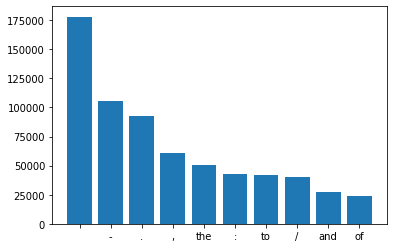

In [25]:
# Print dataframe dict
print(df_dict1)

# Print dict
print(dict1)

# Print number of words
print_words_number()

# print values in asceding order
print(max_values1[0:5])
print(max_values1_spam[0:5])
print(max_values1_nonspam[0:5])

# Plot number of words
plot_dict = dict(max_values1[0:10])
plt.bar(list(plot_dict.keys()), list(plot_dict.values()))
plt.show()

#TODO: Add dict with word to delete